# 1. Group Invariant Metric Tensor

Let's start with the following proposition, as explained in [Jianke Yang et al, "Generative adversarial symmetry discovery, 2023](https://arxiv.org/abs/2302.00236)":

> Given a Lie algebra basis $\{L_i \in \mathbb{R}^{k\times k}\}_{i=1}^{c}, \eta(u, v) = u^{T}Jv (u, v \in \mathbb{R}^{k}, J \in \mathbb{R}^{k\times k}),$ is invariant to infinitesimal transformations in the Lie group $G$ generated by $\{L_i\}_{i=1}^{c}$ if and only if $L_{i}^{T}J + JL_{i} = 0,$ for $i=1, 2 \ldots ,c$.

## 1.1. Proof

An infinitesimal transformation in a group G generated by the given Lie algebra basis can be written as the matrix representation $g = I + \sum_i \epsilon_i L_i $.

$$
\begin{align}
& \eta(u, v)=\eta(g u, g v) \\
\Longleftrightarrow & u^T J v=u^T g^T J g v \\
\Longleftrightarrow & u^T\left(I+\sum_i \epsilon_i L_i^T\right) J\left(I+\sum_i \epsilon_i L_i\right) v=u^T J v \\
\Longleftrightarrow & u^T J v+u^T\left(\sum_i \epsilon_i\left(L_i^T J+J L_i\right)\right) v+O\left(\epsilon^2\right)=u^T J v \\
\Longleftrightarrow & u^T\left(\sum_i \epsilon_i\left(L_i^T J+J L_i\right)\right) v=0, \forall u, v \in \mathbb{R}^n
\end{align}
$$

Now, as this holds for any infinitesimal transformation g, we can set $\epsilon_{−i} = 0$ to get

$$
\epsilon_i\left(L_i^T J+J L_i\right)=0, i=1,2, \ldots, c
$$

Therefore, $L_i^T J+J L_i=0, i=1,2, \ldots, c$.

On the other hand, if $L_i^T J+J L_i=0, i=1,2, \ldots, c$, then

$$
\sum_i \epsilon_i\left(L_i^T J+J L_i\right) = 0, \forall \epsilon \in \mathbb{R}^{c}
$$

*QED*

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# work on color map
# get analytical expression for metric tensor

## Let's load and plot the found generators (through LieGAN) first.

In [24]:
L = torch.load('data/top-tagging-L.pt')

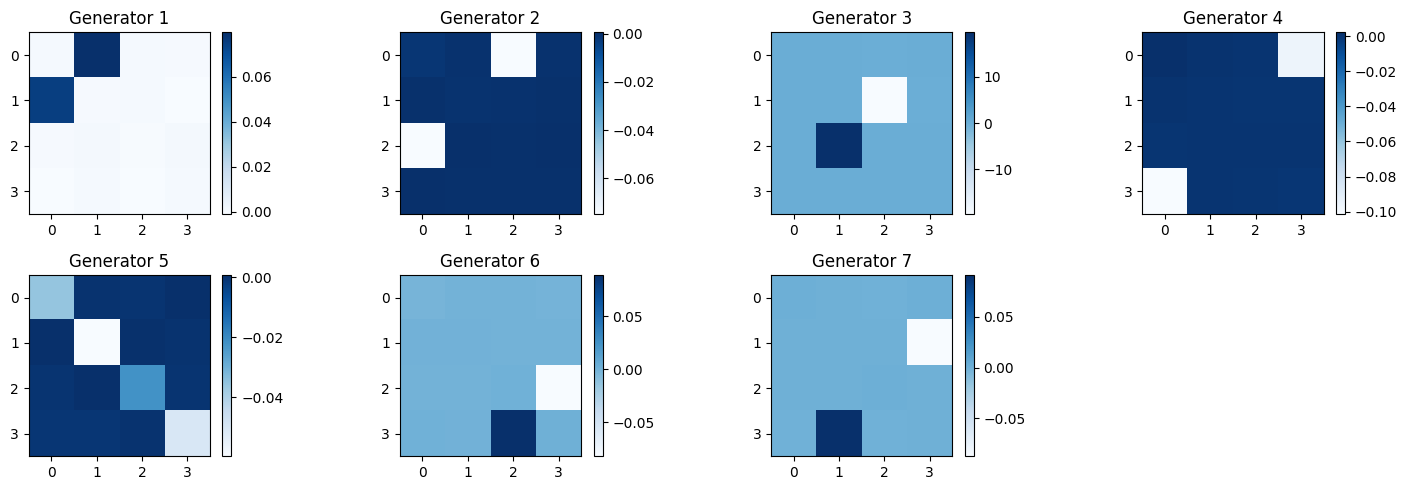

In [63]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 5))


for idx, Lie in enumerate(L):
    # Plot the generators
    if idx >= 4:
        im1 = axes[1][idx%4].imshow(Lie.detach().numpy(), cmap='Blues', interpolation='nearest')        
        axes[1][idx%4].set_title('Generator {}'.format(idx + 1))
        fig.colorbar(im1, ax=axes[1][idx%4], fraction=0.046, pad=0.04)
    else:
        im1 = axes[0][idx].imshow(Lie.detach().numpy(), cmap='Blues', interpolation='nearest')
        axes[0][idx].set_title('Generator {}'.format(idx + 1))
        fig.colorbar(im1, ax=axes[0][idx], fraction=0.046, pad=0.04)

axes[1, 3].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### These are the canonical representations of the Lorentz generators.

Particles moving in a laboratory at velocities neighboring the speed of light, like at the LHC, are described by special relativity. Its fundamental idea is that the laws of physics are the same for all observers in different inertial frames. Mathematically, the transformations between two inertial frames of reference are described by the so-called Lorentz group, mathematically represented as $O(1,3)$. Typically, one restricts the frames to be positively space-oriented and positively time-oriented, which gives rise to a subgroup called the proper orthochronous Lorentz group, or $SO^{+}(1,3)$ - but often just referred to as the Lorentz group. In notebook $1$, we used a Lie Generative Adversarial Network (LieGAN) to machine learn the underlying symmetry behind quark-gluons. By looking at the canonical representations of the Lorentz generators, we see that machine learning 'rediscovers' special relativity, purely from the data:

1. **Rotation Generators $L^{ij}$:**


\begin{align}
   (L^{12})^{\mu}_{\ \nu} = \begin{pmatrix}
   0 & 0 & 0 & 0 \\
   0 & 0 & 1 & 0 \\
   0 & -1 & 0 & 0 \\
   0 & 0 & 0 & 0
   \end{pmatrix},\;\;
    (L^{13})^{\mu}_{\ \nu} = \begin{pmatrix}
   0 & 0 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 0 & 0 \\
   0 & -1 & 0 & 0
   \end{pmatrix},\;\;
      (L^{23})^{\mu}_{\ \nu} = \begin{pmatrix}
   0 & 0 & 0 & 0 \\
   0 & 0 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & -1 & 0
   \end{pmatrix}
\end{align}


2. **Boost Generators $L^{0i}$:**


\begin{align}
   (L^{01})^{\mu}_{\ \nu} = \begin{pmatrix}
   0 & 1 & 0 & 0 \\
   1 & 0 & 0 & 0 \\
   0 & 0 & 0 & 0 \\
   0 & 0 & 0 & 0
   \end{pmatrix},\;\;
   (L^{02})^{\mu}_{\ \nu} = \begin{pmatrix}
   0 & 0 & 1 & 0 \\
   0 & 0 & 0 & 0 \\
   1 & 0 & 0 & 0 \\
   0 & 0 & 0 & 0
   \end{pmatrix},\;\;
   (L^{03})^{\mu}_{\ \nu} = \begin{pmatrix}
   0 & 0 & 0 & 1 \\
   0 & 0 & 0 & 0 \\
   0 & 0 & 0 & 0 \\
   1 & 0 & 0 & 0
   \end{pmatrix}
\end{align}

# 2. Invariant metric extraction

Now, once we have the generators $L$ of the underlying group, we can extract the invariant metric tensor $J$ to further build invariant features, effectively baking invariance-equivariance into our Quantum Graph Neural Network (QGNN). To do so, we can solve for:

\begin{equation}
    L_{i}\cdot J + J^{T}\cdot L_{i} = 0
\end{equation}

Numerically, a small push from zero is enough to avoid getting the trivial solution $J = 0$:

\begin{equation}
\underset{J}{\operatorname{argmin}} \sum_{i=1}^{c} ||L_{i}\cdot J + J^{T}\cdot L_{i}||^{2} -a||J||^{2}
\end{equation}

The proof for this equation can also be found in [[1]](https://arxiv.org/abs/2302.00236). The code below implements this procedure and was kindly given by the authors:

In [38]:
a = 0.05
lr = 1.0
lr_sgd = 1e-4
J = torch.randn(3, 3, requires_grad=True)
# optimizer = torch.optim.LBFGS([J], lr=lr)
optimizer = torch.optim.Adam([J], lr=lr_sgd)
# scheduler = StepLR(optimizer, step_size=250, gamma=0.1)

losses = []

def closure():
    optimizer.zero_grad()
    loss = 0.0
    for j in range(L.shape[0]):
        Lj = L[j]
        loss += torch.sum(torch.square(Lj.transpose(0, 1) @ J + J @ Lj))
    loss -= a * torch.linalg.norm(J)
    losses.append(loss.item())
    loss.backward()
    return loss

for i in range(2500):
    optimizer.step(closure)
    # if i <= 1000:
    #     scheduler.step()
print(J)

tensor([[-0.3211,  2.4436, -1.2861],
        [-0.6132, -1.4567, -0.6973],
        [ 0.4740,  0.9274, -1.2071]], requires_grad=True)


## Let's analyze the metric tensor

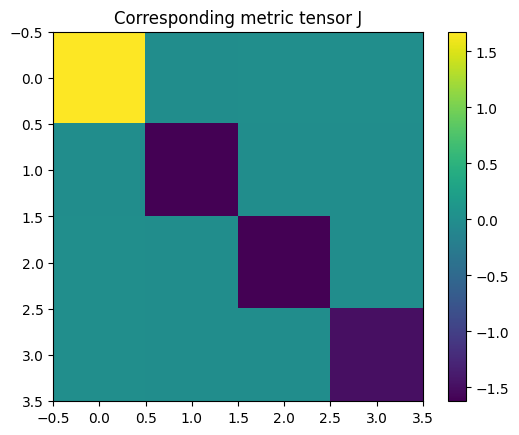

In [19]:
plt.imshow(J.detach().numpy())
plt.title("Corresponding metric tensor J")
plt.colorbar()
plt.show()

## We found the Minkowski metric!

Going back to special relativity, spacetime is treated as a four-dimensional manifold with coordinates $(t, x, y, z)$, where $(t)$ represents time and $(x, y, z)$ represent spatial coordinates. The Minkowski metric allows us to calculate the spacetime distance between two events in this manifold, and the spacetime distance $ds^2$ between two infinitesimally close events is given by:

\begin{equation}
ds^2 = \eta_{\mu\nu} \, dx^\mu \, dx^\nu,
\end{equation}

which, in explicit form, it becomes:

\begin{equation}
ds^2 = -c^2 \, dt^2 + dx^2 + dy^2 + dz^2 .
\end{equation}

But this distance is induced by the Minkowski metric tensor $\eta_{\mu\nu}$, which canonically is given by:

\begin{align}
\eta_{\mu\nu} = \begin{pmatrix}
-1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix},
\end{align}

where the indices $\mu$ and $\nu$ run over the four spacetime coordinates ($0$ for time, $1$ for $x$, $2$ for $y$, and $3$ for $z$). From our machine-learned metric, now we'll understand how to build invariant features for our LieEQGNN, in the next notebook.

## References

[[1] - Jianke Yang, Robin Walters, Nima Dehmamy, and Rose Yu. Generative adversarial symmetry discovery, 2023](https://arxiv.org/abs/2302.00236).